In [11]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)
seaborn.set_context("talk")

Populating the interactive namespace from numpy and matplotlib


In [12]:
import sklearn.datasets
import sklearn.linear_model

In [3]:
bos = sklearn.datasets.load_boston()
print(bos["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [14]:
X = bos["data"][:, 0:1]
y = bos["target"]
model = sklearn.linear_model.LinearRegression().fit(X, y)

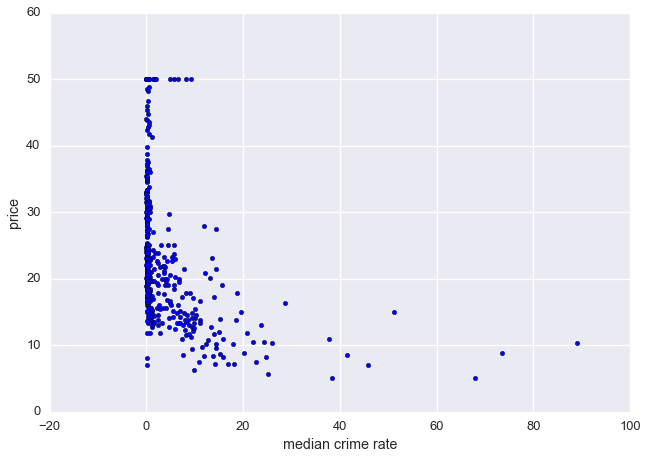

In [15]:
plt.scatter(X, y)
plt.ylabel("price")
plt.xlabel("median crime rate")

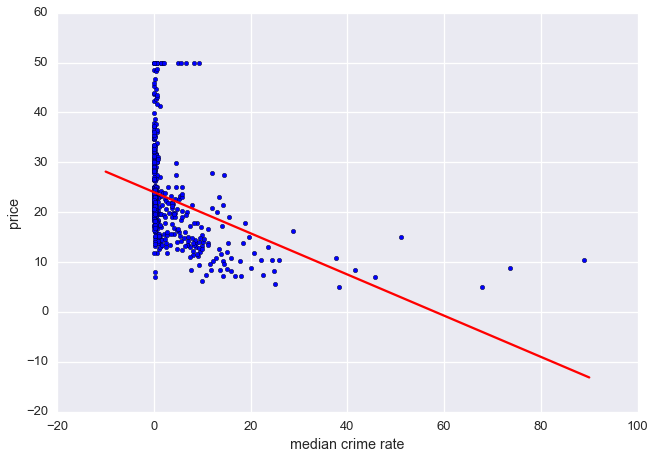

In [16]:
fig = plt.figure(1)
plt.scatter(X, y)
test_x = np.linspace(-10, 90, 100).reshape(-1, 1)
test_y = model.predict(test_x)
plt.plot(test_x, test_y, c ="red" )
plt.ylabel("price")
plt.xlabel("median crime rate")

In [17]:
import sklearn.neighbors

In [35]:
knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors= 1).fit(X, y)

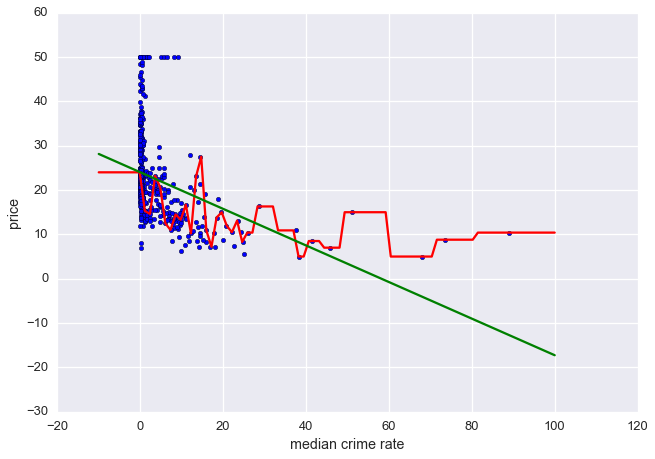

In [36]:
fig = plt.figure(1)
plt.scatter(X[:, 0:1], y)

test_x = np.linspace(-10, 100, 90).reshape(-1, 1)
test_y = knn_model.predict(test_x)
plt.plot(test_x, test_y, c ="red" )

test_y = model.predict(test_x)
plt.plot(test_x, test_y, c ="green" )

plt.ylabel("price")
plt.xlabel("median crime rate")

In [ ]:
ialpha = 1

In [2]:
def make_data(N):
    gx = np.linspace(-3, 3, 500).reshape(500,1)
    dx = np.random.random(size=(N, 1)) * 6 - 3
    return gx, dx

In [3]:
def make_weights(K):
    return np.sqrt(ialpha) * np.random.normal(size = (K, 1))

In [4]:
def id_basis(x, K):
    return x

In [115]:
def cos_basis(x, K):
    return np.cos(x * np.arange(0, K)) 

In [187]:
def sin_basis(x, K):
    return np.cos(x * np.arange(0, K)) 

In [163]:
def poly_basis(x, K):
    return np.power(x, np.arange(0, K)+1)

In [179]:
bw = 0.5
def rbf_basis(x, K):
    return np.exp(-np.power(x - (np.linspace(-3, 3, K) / bw) , 2))

In [5]:
basis = id_basis

In [6]:
K = 5
N = 50
ibeta = 0.2
gx, dx = make_data(N)
gPhi = basis(gx, K)
dPhi = basis(dx, K)
wts  = make_weights(K)
gy   = np.dot(gPhi, wts)
df   = np.dot(dPhi, wts)
dy   = df + np.sqrt(ibeta)*np.random.normal(size = df.shape) # Add noise

NameError: name 'np' is not defined

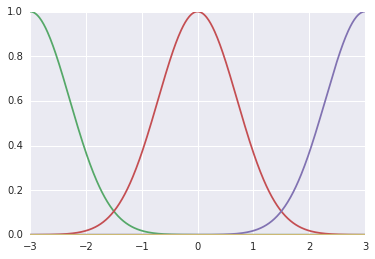

In [184]:
plt.plot(gx, gPhi)

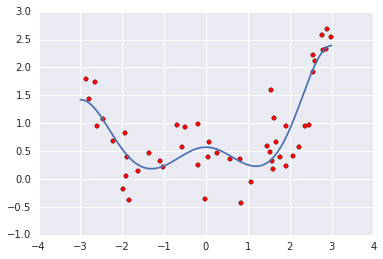

In [185]:
plt.scatter(dx[:,0],dy[:,0], c ="red")
plt.plot(gx, gy)

<Container object of 5 artists>

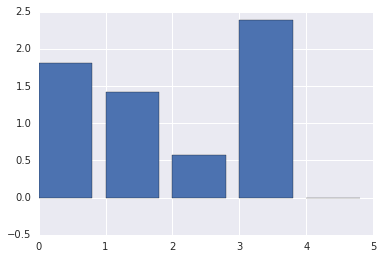

In [186]:
plt.bar(np.arange(K), wts)

In [213]:
dy1 = sklearn.linear_model.LinearRegression().fit(dx, dy).predict(gx)
dy2 = sklearn.linear_model.LinearRegression().fit(dPhi, dy).predict(gPhi)

In [209]:
dy1.shape

(50, 1)

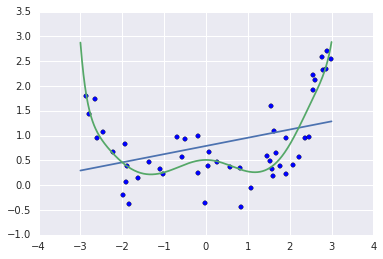

In [216]:
plt.scatter(dx, dy)
plt.plot(gx, dy1)
plt.plot(gx, dy2)